# **AVOCADO PRICE PREDICTION**

## **1. DATA UNDERSTANDING**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [116]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/avocado.csv",index_col=[0])

In [3]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [4]:
df.shape

(16468, 13)

In [5]:
print(df.isnull().sum())

Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64


**REMOVING ALL NULL VALUE FROM DATA SET**

In [117]:
df=df.dropna()

In [7]:
print(df.isnull().sum())

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64


In [8]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year            float64
region           object
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1517 entries, 0.0 to 14.0
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1517 non-null   object 
 1   AveragePrice  1517 non-null   float64
 2   Total Volume  1517 non-null   float64
 3   4046          1517 non-null   float64
 4   4225          1517 non-null   float64
 5   4770          1517 non-null   float64
 6   Total Bags    1517 non-null   float64
 7   Small Bags    1517 non-null   float64
 8   Large Bags    1517 non-null   float64
 9   XLarge Bags   1517 non-null   float64
 10  type          1517 non-null   object 
 11  year          1517 non-null   float64
 12  region        1517 non-null   object 
dtypes: float64(10), object(3)
memory usage: 165.9+ KB


In [10]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


In [11]:
df['Date']

0.0     27-12-2015
1.0     20-12-2015
2.0     13-12-2015
3.0     06-12-2015
4.0     29-11-2015
           ...    
10.0    16-10-2016
11.0    09-10-2016
12.0    02-10-2016
13.0    25-09-2016
14.0    18-09-2016
Name: Date, Length: 1517, dtype: object

In [118]:
# new data frame with split value columns
new = df["Date"].str.split("-", n = 1, expand = True)


df["Date"]= new[0]

df["Month"]= new[1]
#df["year"]= new[2]

new2 = df["Month"].str.split("-", n = 1, expand = True)

df["Month"]= new2[0]
df["year"]= new2[1]

df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0.0,27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany,12
1.0,20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany,12
2.0,13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany,12
3.0,06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany,12
4.0,29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10.0,16,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte,10
11.0,09,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte,10
12.0,02,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte,10
13.0,25,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte,09


In [13]:
df['Date']

0.0     27
1.0     20
2.0     13
3.0     06
4.0     29
        ..
10.0    16
11.0    09
12.0    02
13.0    25
14.0    18
Name: Date, Length: 1517, dtype: object

In [119]:
df['Date']=df['Date'].astype(int)
df['Month']=df['Month'].astype(int)
df['year']=df['year'].astype(int)

In [15]:
df.corr()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month
Date,1.000000,0.092531,-0.022423,-0.018394,-0.032709,-0.014611,-0.009035,-0.003583,-0.038890,0.009174,0.023543,0.034279
AveragePrice,0.092531,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,0.178683,0.066859
Total Volume,-0.022423,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717,-0.004189,-0.090520
4046,-0.018394,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,-0.040439,-0.090647
4225,-0.032709,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,-0.007254,-0.091329
4770,-0.014611,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,0.029222,-0.074855
Total Bags,-0.009035,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,0.090108,-0.081330
Small Bags,-0.003583,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,0.106382,-0.084376
Large Bags,-0.038890,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,-0.018678,-0.062447
XLarge Bags,0.009174,-0.048284,0.521717,0.474063,0.504718,0.646053,0.601856,0.611300,0.447779,1.000000,0.218342,0.049232


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1517 entries, 0.0 to 14.0
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1517 non-null   int64  
 1   AveragePrice  1517 non-null   float64
 2   Total Volume  1517 non-null   float64
 3   4046          1517 non-null   float64
 4   4225          1517 non-null   float64
 5   4770          1517 non-null   float64
 6   Total Bags    1517 non-null   float64
 7   Small Bags    1517 non-null   float64
 8   Large Bags    1517 non-null   float64
 9   XLarge Bags   1517 non-null   float64
 10  type          1517 non-null   object 
 11  year          1517 non-null   int64  
 12  region        1517 non-null   object 
 13  Month         1517 non-null   int64  
dtypes: float64(9), int64(3), object(2)
memory usage: 177.8+ KB


## **2.EDA**

In [17]:
print(df['region'].value_counts())

California             76
Albany                 67
Boise                  65
BaltimoreWashington    65
Boston                 62
Atlanta                54
PhoenixTucson          52
BuffaloRochester       51
Spokane                49
Columbus               47
NewYork                44
Jacksonville           41
Detroit                40
SouthCentral           39
SanDiego               38
West                   36
Louisville             34
Tampa                  34
Charlotte              31
Portland               30
Houston                29
NorthernNewEngland     29
WestTexNewMexico       27
Nashville              25
TotalUS                25
Denver                 24
SouthCarolina          24
Chicago                23
GrandRapids            23
Pittsburgh             22
Orlando                21
RichmondNorfolk        21
Syracuse               19
HarrisburgScranton     19
GreatLakes             18
Midsouth               18
DallasFtWorth          17
Roanoke                17
MiamiFtLaude

In [18]:
print(df['type'].value_counts())

conventional    1517
Name: type, dtype: int64


**SINCE THERE IS ONLY VALUE IN TYPE REMOVING THAT COLUMN**

In [19]:
df=df.drop('type',axis=1)

In [20]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Month
0.0,27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015,Albany,12
1.0,20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015,Albany,12
2.0,13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015,Albany,12
3.0,6,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015,Albany,12
4.0,29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015,Albany,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10.0,16,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016,Charlotte,10
11.0,9,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016,Charlotte,10
12.0,2,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016,Charlotte,10
13.0,25,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016,Charlotte,9


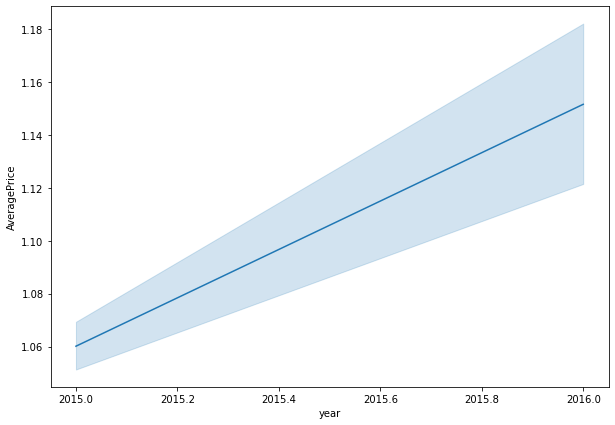

In [114]:
plt.figure(figsize=(10,7))
sns.lineplot(x='year', y='AveragePrice', data=df)
plt.show()

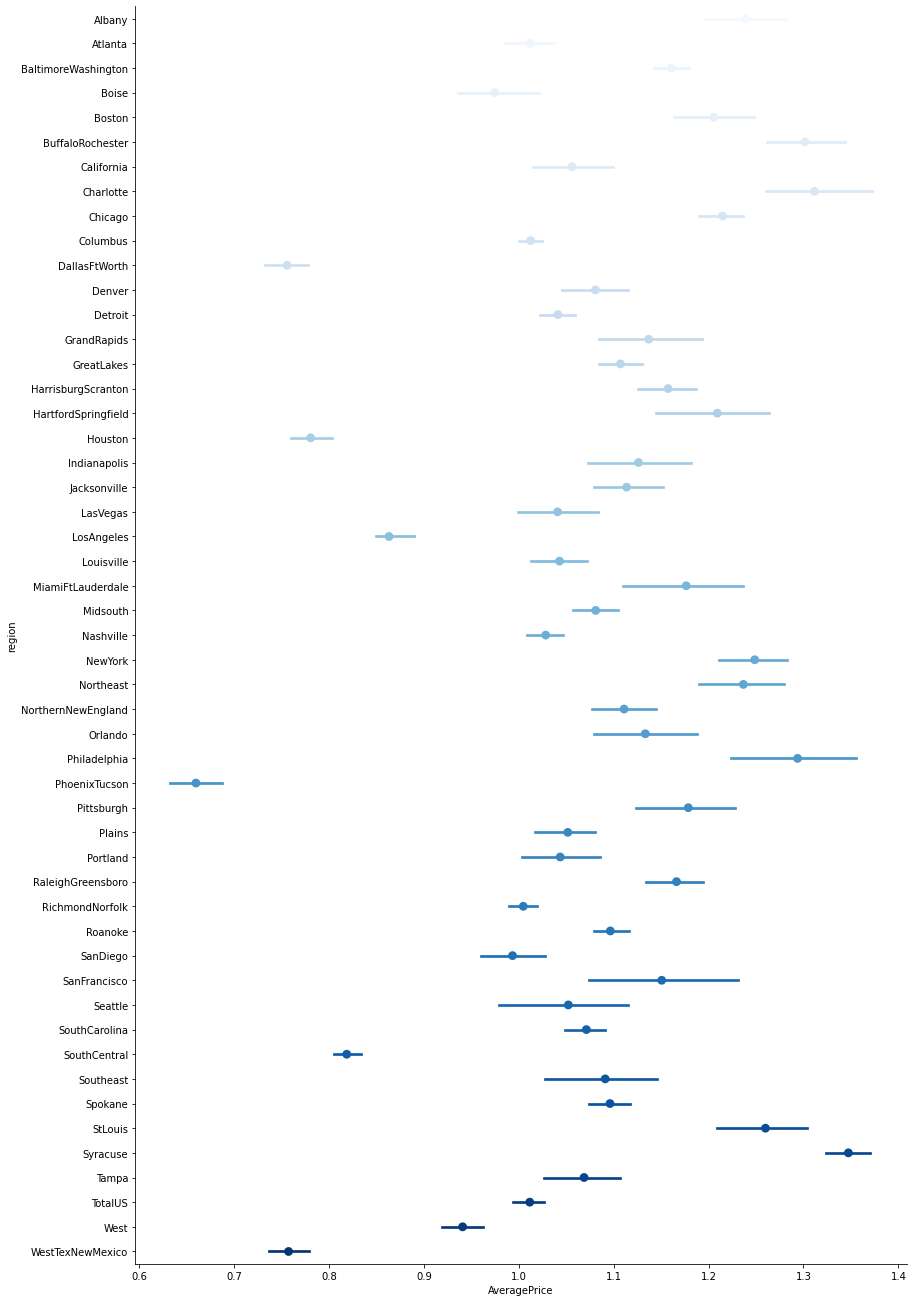

In [120]:
# Factorplot Display distribution of data across all level of category
sns.factorplot('AveragePrice','region',data=df,size=18,aspect=0.7,palette='Blues',join=False)

In [21]:
df_continuous=df.drop(columns='region')
df_catogorical=df['region']

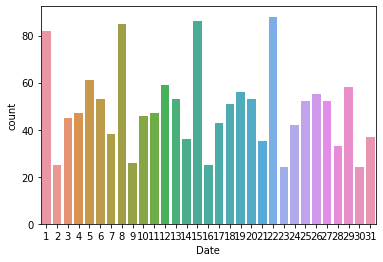

In [100]:
sns.countplot(df_continuous['Date'])

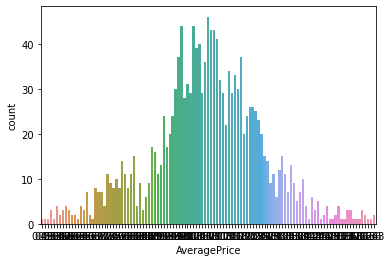

In [101]:
sns.countplot(df_continuous['AveragePrice'])

**AVERAGE PRICE THE PREDITOR VARIABLE IS NORMALLY DISTRIBUTED**

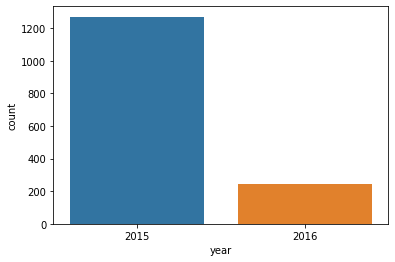

In [102]:
sns.countplot(x='year',data=df_continuous)

WE HAVE 2015 RECORDS ARE HIGHER THAN 2016 RECORDS

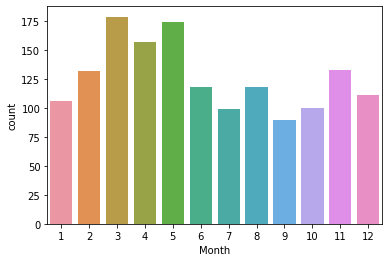

In [103]:
sns.countplot(x='Month',data=df_continuous)

**ALL THE MONTHS ARE EQUALLY DISTRIBUTED i.e THERE IS NO SEASON FOR AVACADO SALES**

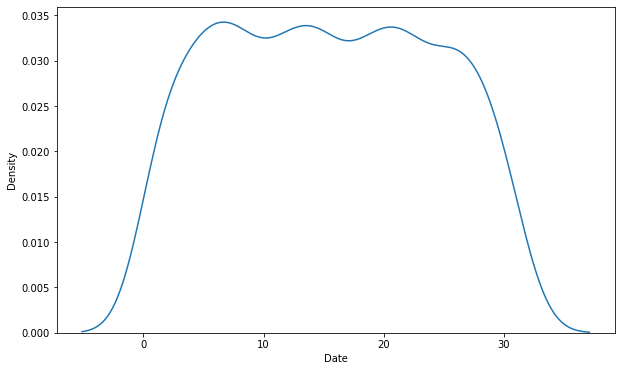

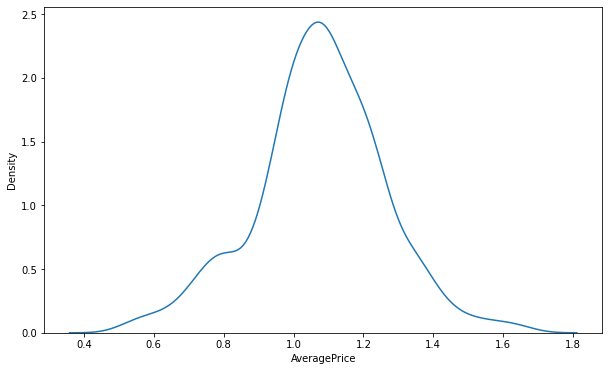

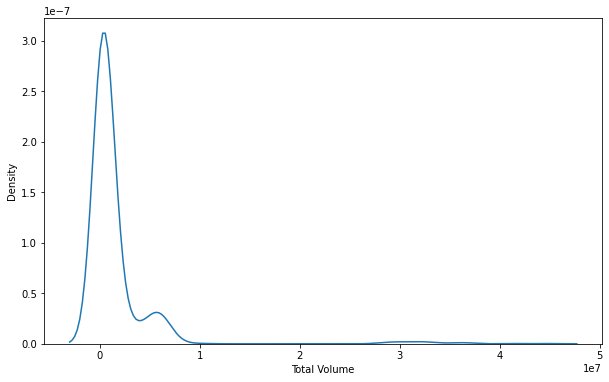

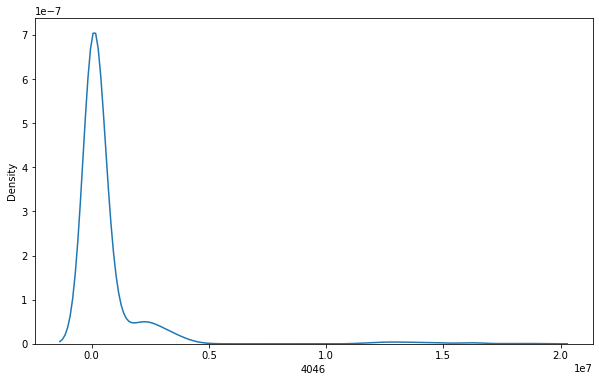

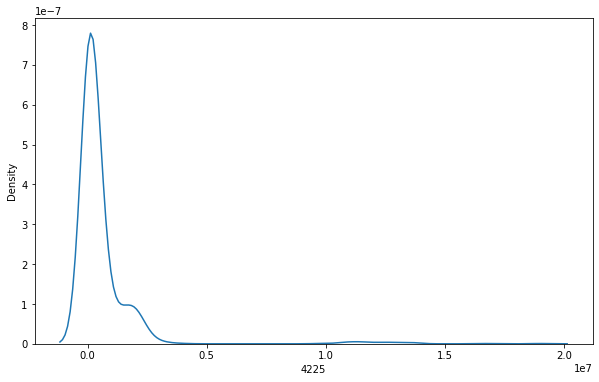

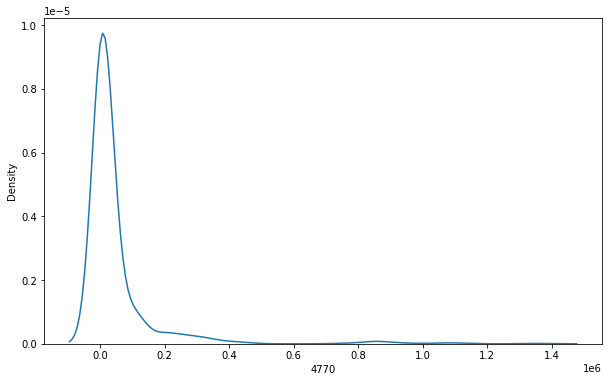

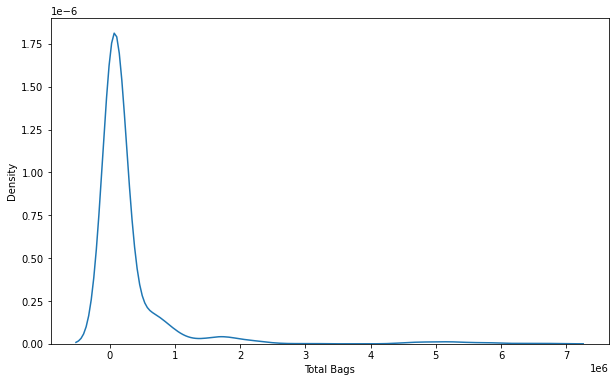

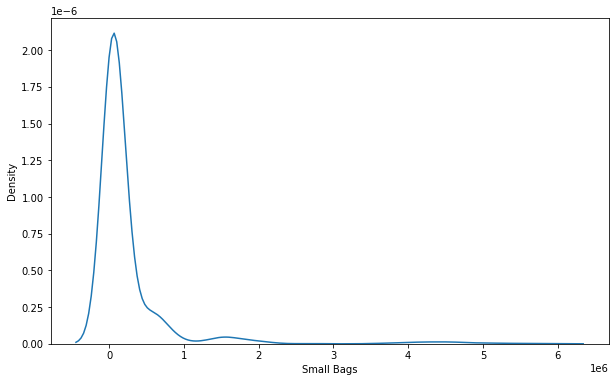

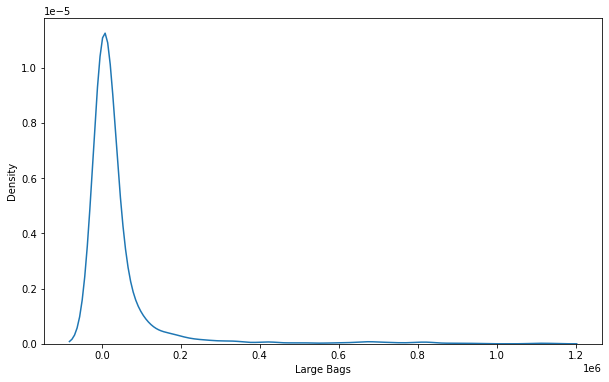

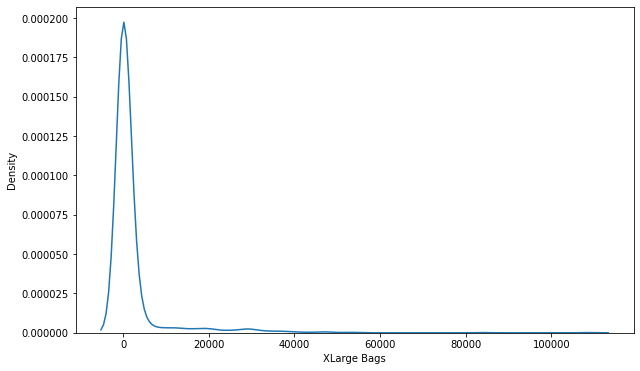

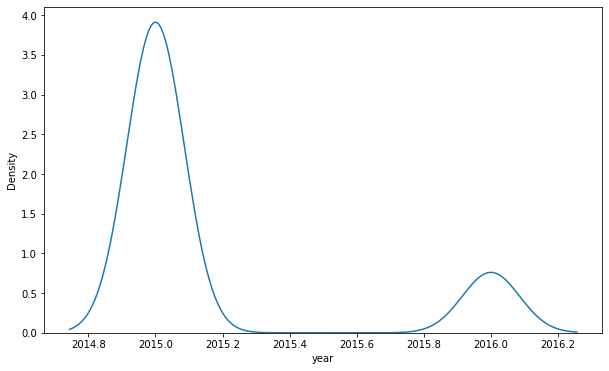

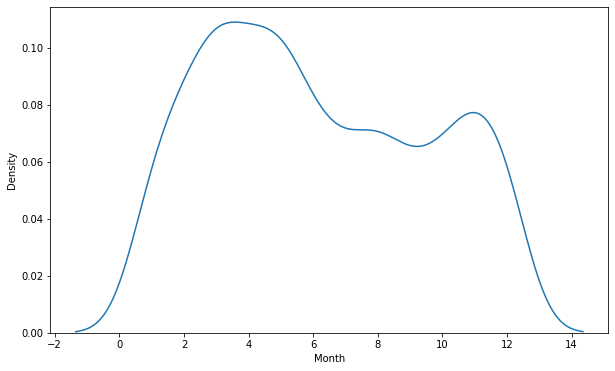

In [98]:
for i in df_continuous.columns:
  plt.figure(figsize=[10,6])
  sns.kdeplot(df_continuous[i])

**NOT ALL THE DATA ARE NORMALLY DISTRIBUTED ONLY PREDICTOR "AVERAGE PRICE" IS NORMALLY DISTRIBUTED **

**THERE IS HIGH SKEWNESS PRESENT IN DATA WHICH NEED TO BE TREATED** 

In [23]:
df['AveragePrice'].describe()

count    1517.000000
mean        1.074990
std         0.188891
min         0.490000
25%         0.980000
50%         1.080000
75%         1.190000
max         1.680000
Name: AveragePrice, dtype: float64

**PLOTING THE BOX PLOT TO SEE  THE OUTLIERS PRESENT IN THE DATA**

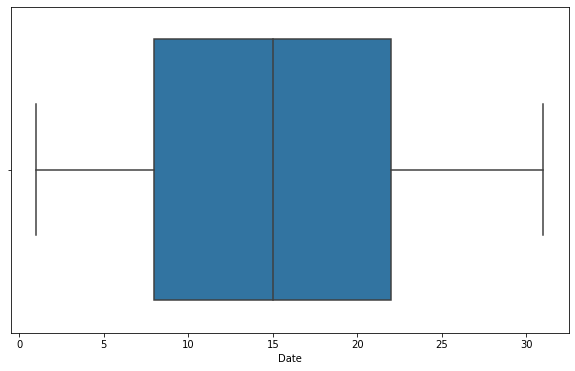

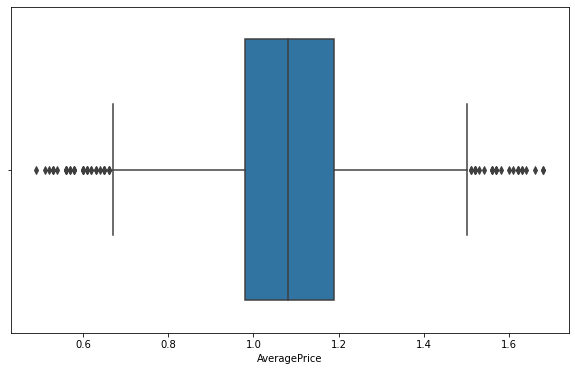

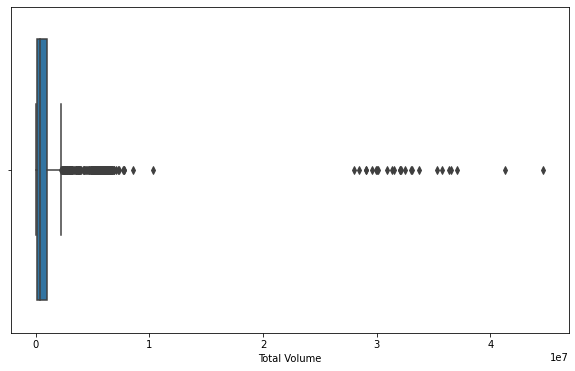

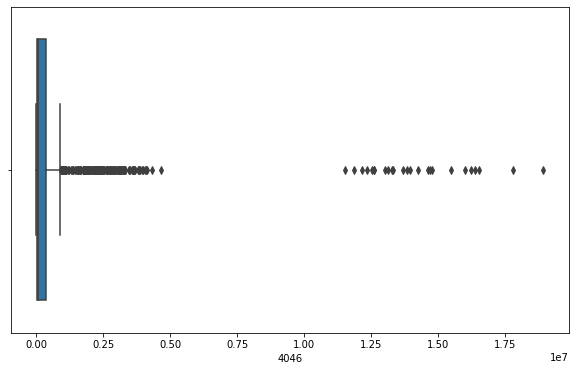

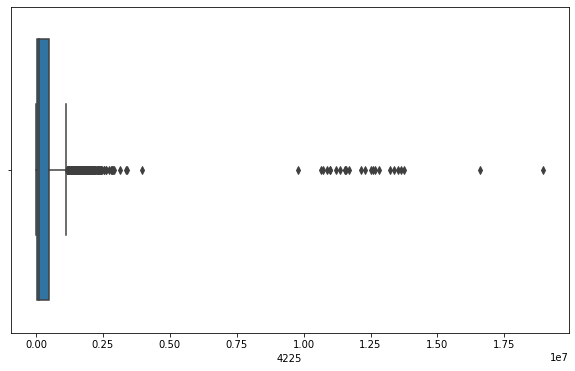

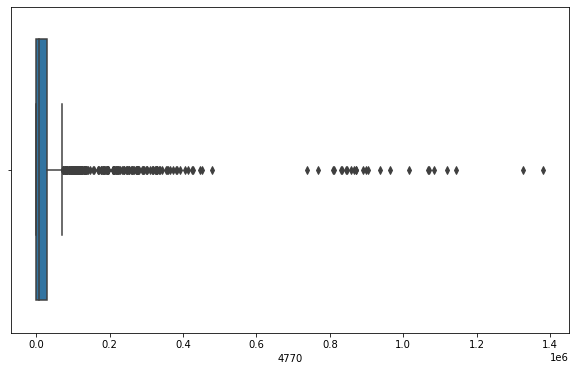

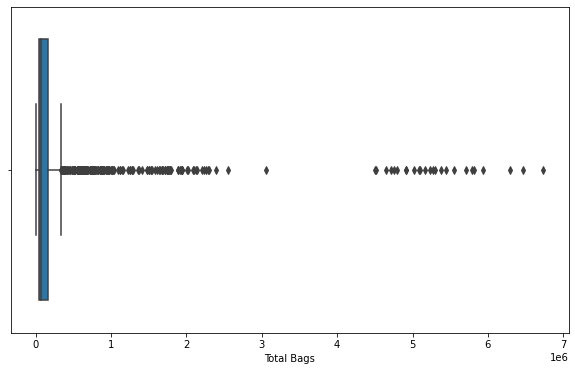

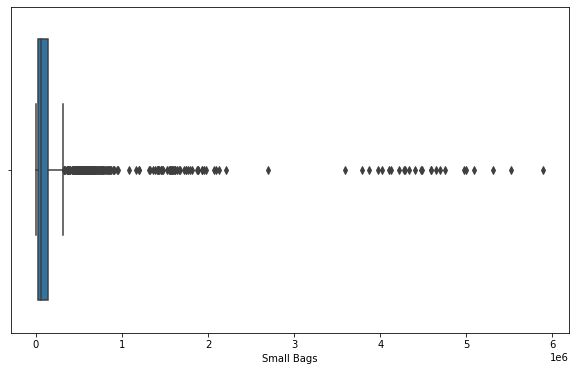

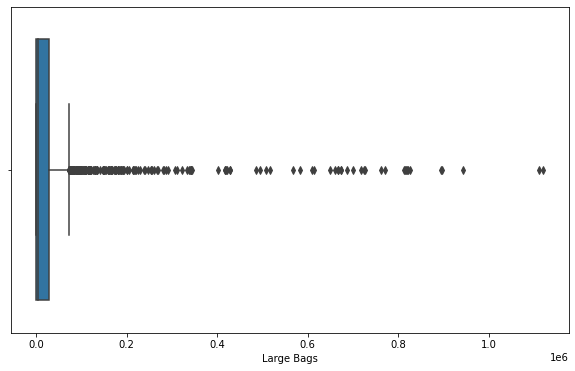

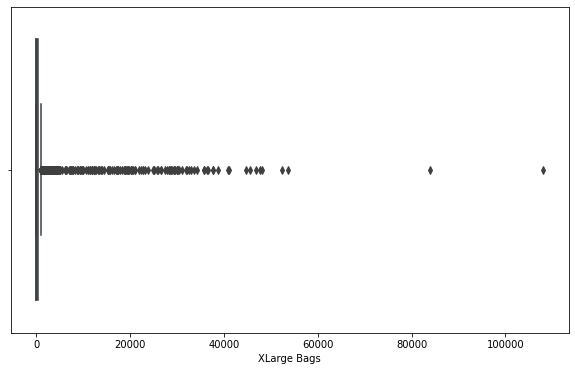

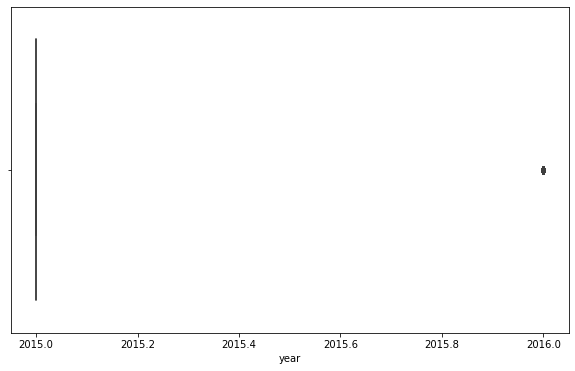

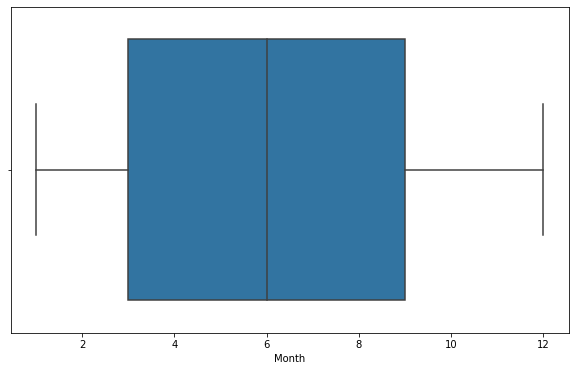

In [24]:
for i in df_continuous.columns:
  plt.figure(figsize=(10,6))
  sns.boxplot(df_continuous[i])

### **OUTLIER IS HIGHLY PRESENT ALL THE DATA EXCEPT "AVERAGE PRICE" **

**THAT IS THE REASON FOR SKEWNESS**

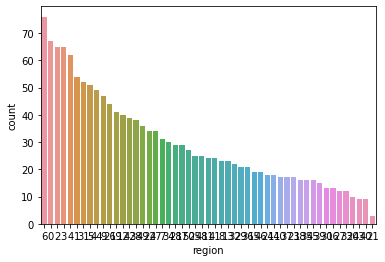

In [105]:
sns.countplot(x='region',data=df,order=df['region'].value_counts().index)

**SOME OF THE STATE PRODUCE HIGH AVOCADO COMPARED TO OTHER STATES**

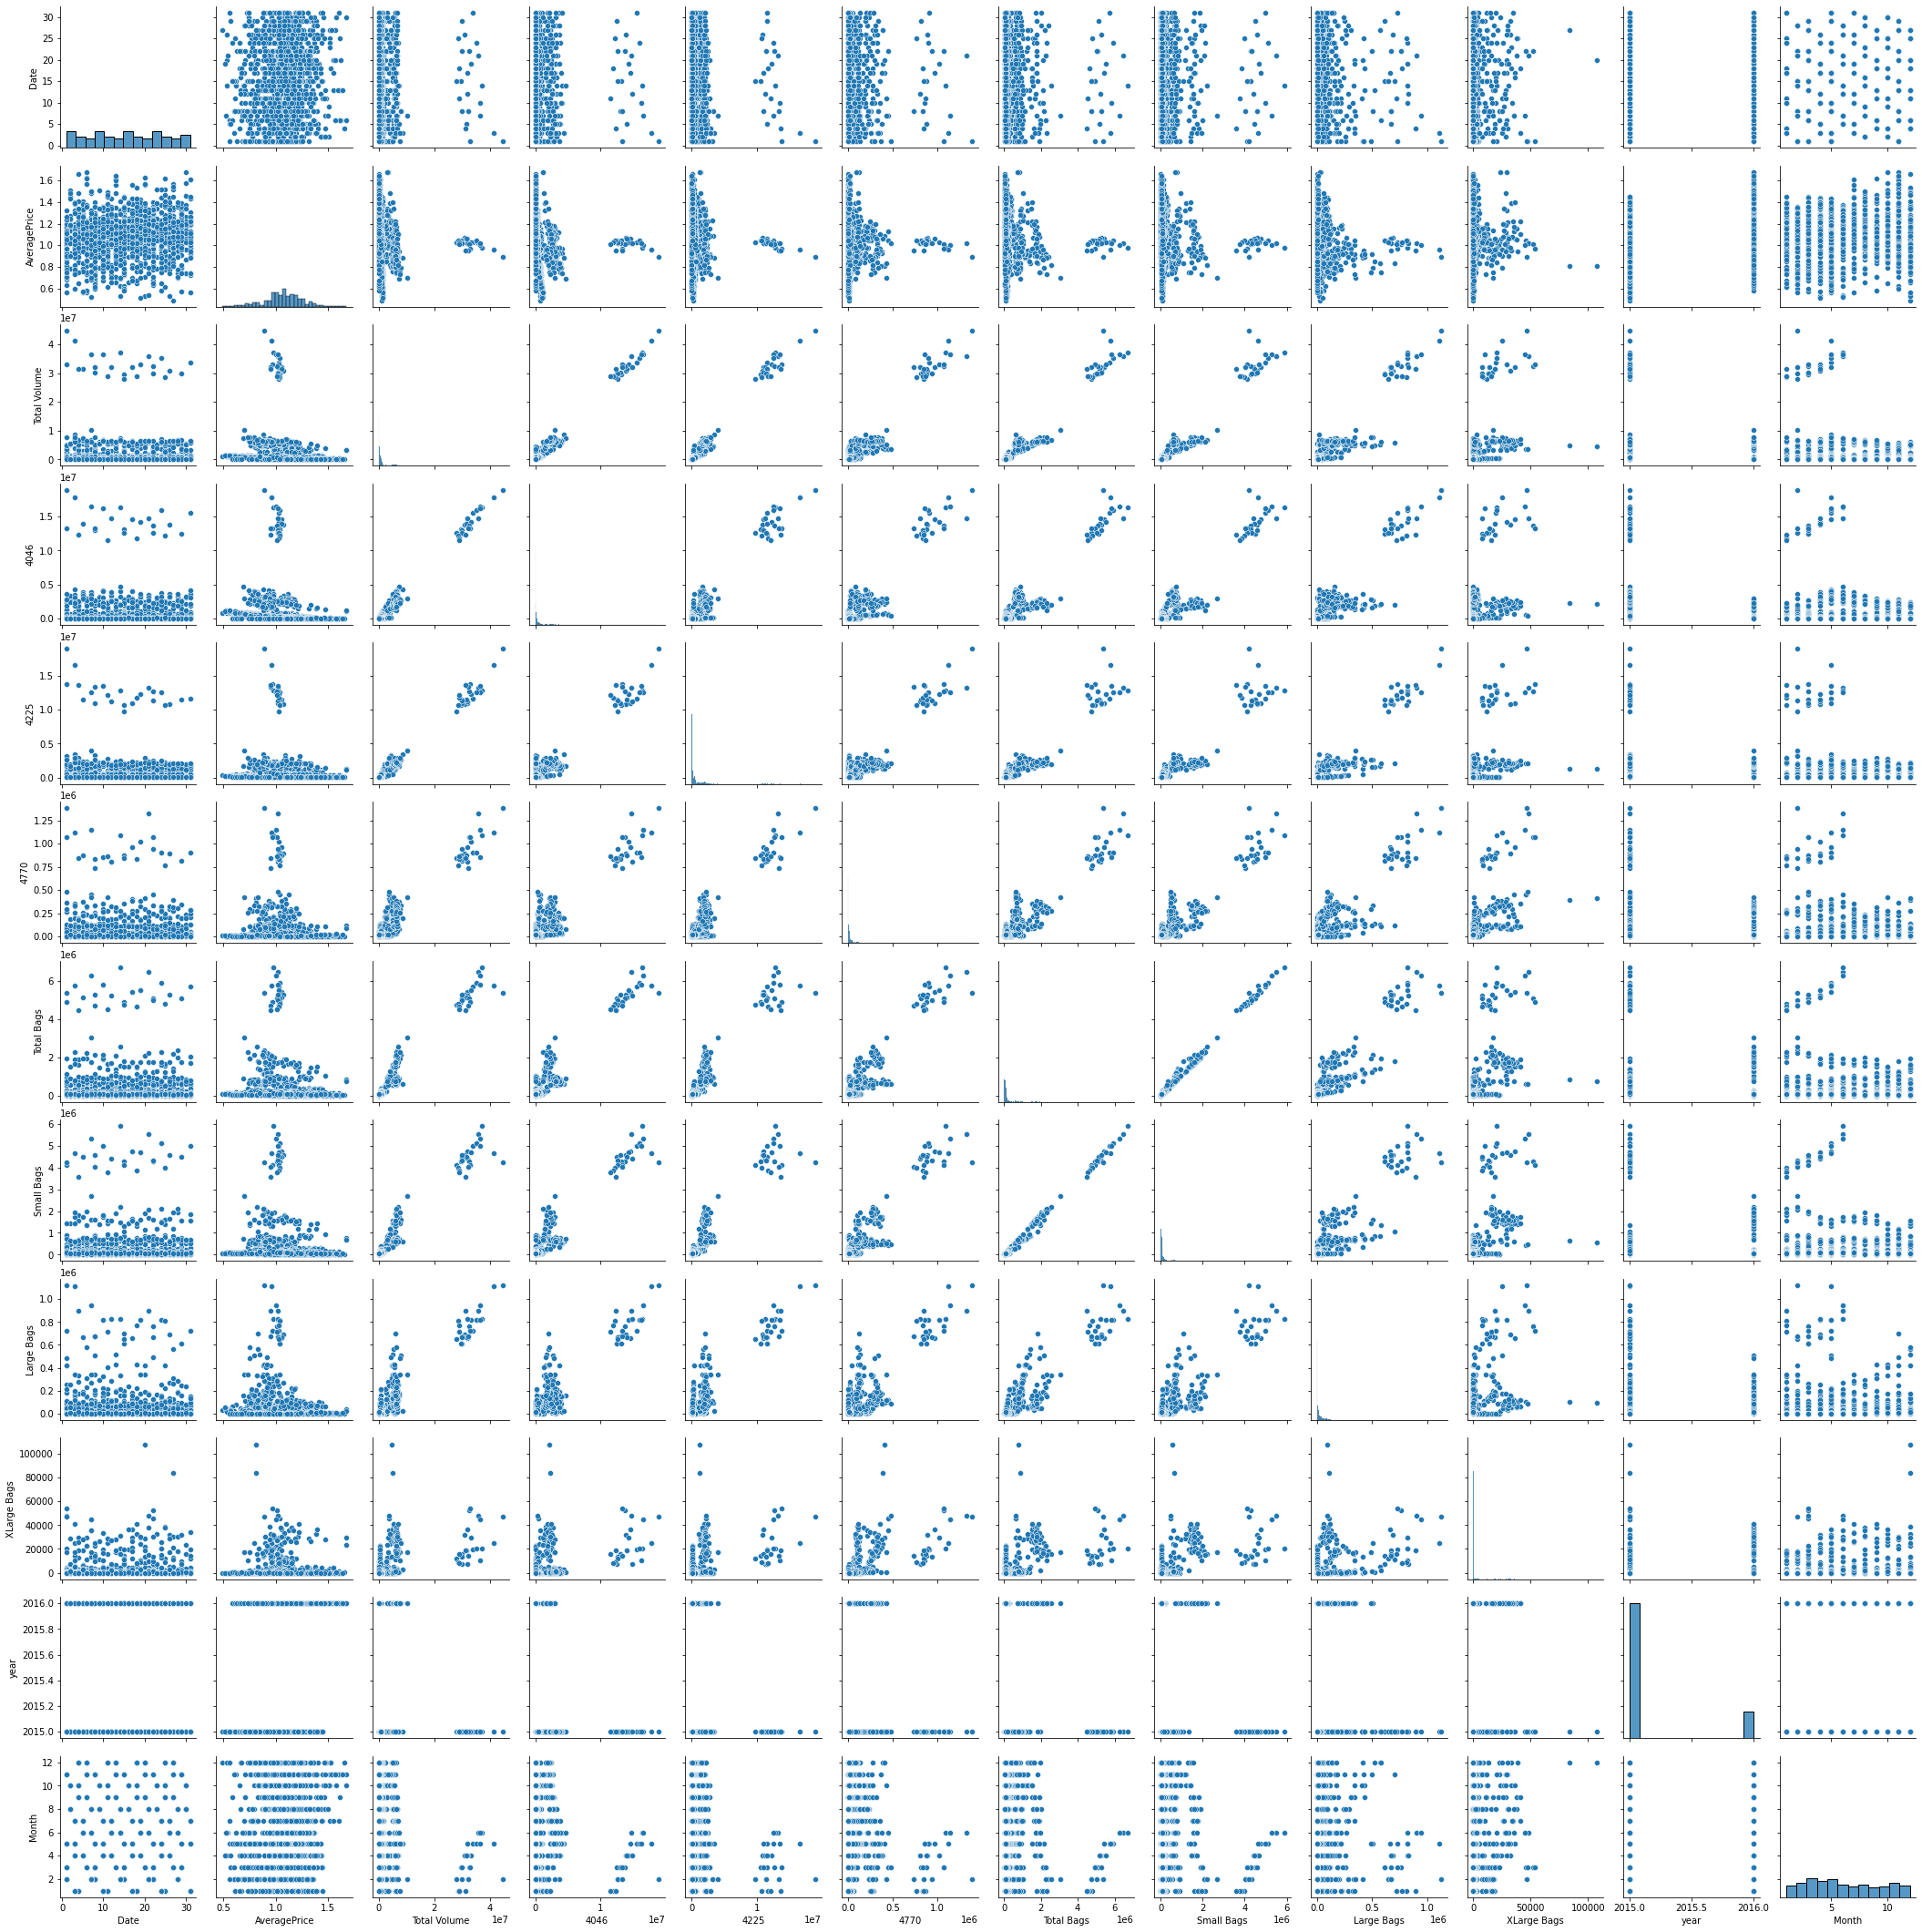

In [106]:
sns.pairplot(df_continuous)

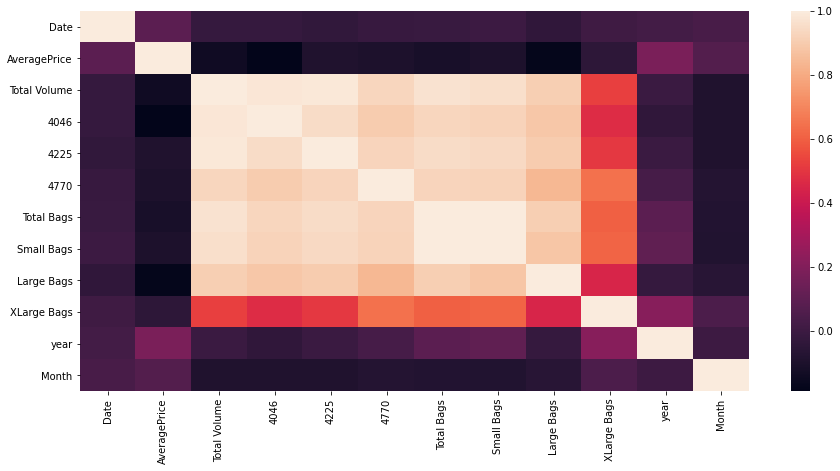

In [108]:
df_corr=df_continuous.corr()
plt.figure(figsize=[15,7])
sns.heatmap(df_corr)


*There is no column fairely correlated with Average price

4046,4225,4770,Total Volume are highly correlated with each other, that could be possible because they all are sold information

In [27]:
df.drop('Total Bags',axis=1,inplace=True)

In [28]:
df_corr["AveragePrice"]

Date            0.092531
AveragePrice    1.000000
Total Volume   -0.140470
4046           -0.190096
4225           -0.092084
4770           -0.100567
Total Bags     -0.111597
Small Bags     -0.097682
Large Bags     -0.177480
XLarge Bags    -0.048284
year            0.178683
Month           0.066859
Name: AveragePrice, dtype: float64

## **3.FEATURE ENGINEERING**

### **Encoding**

In [29]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['region']=LE.fit_transform(df['region'])

In [30]:
df.skew()

Date            0.027740
AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
year            1.828332
region          0.288146
Month           0.233418
dtype: float64

### **skewness and outlier handling**

In [31]:
from sklearn.preprocessing import power_transform

df[['Total Volume','4046','4225','4770','Small Bags','Large Bags','XLarge Bags']]=power_transform(df[['Total Volume','4046','4225','4770','Small Bags','Large Bags','XLarge Bags']],method='yeo-johnson')

In [32]:
df.skew()

Date            0.027740
AveragePrice   -0.109444
Total Volume    0.000000
4046           -0.012059
4225            0.008450
4770           -0.032945
Small Bags      0.027632
Large Bags     -0.074795
XLarge Bags     0.417289
year            1.828332
region          0.288146
Month           0.233418
dtype: float64

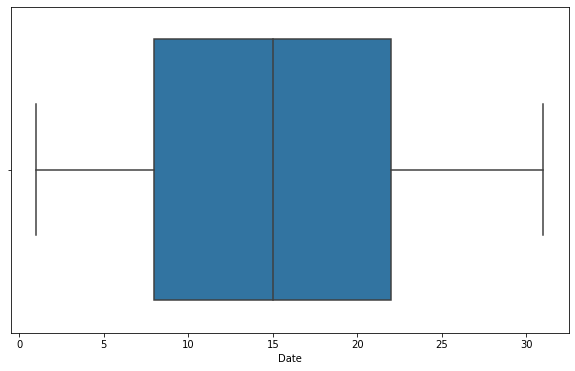

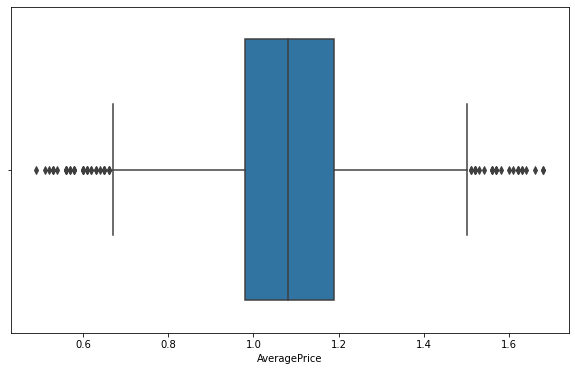

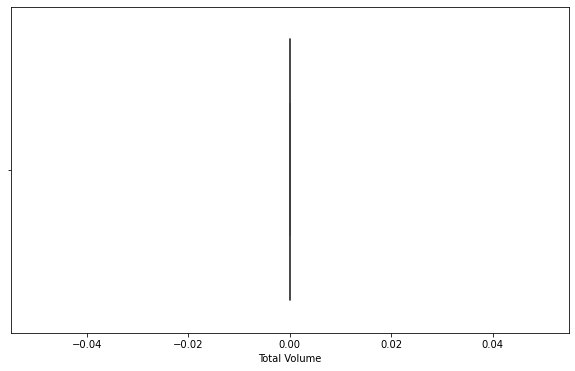

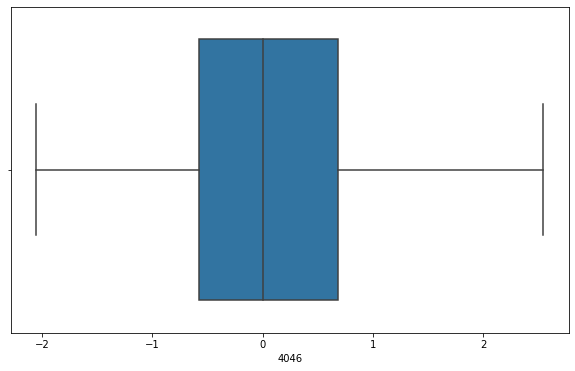

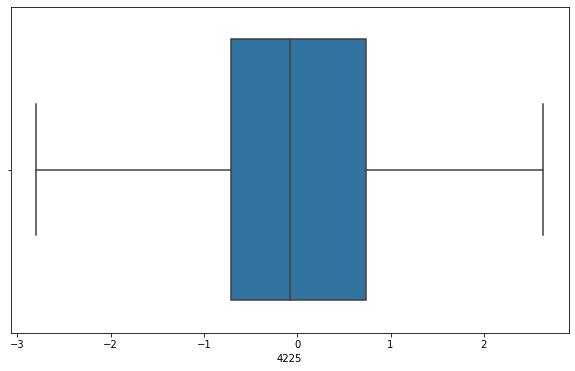

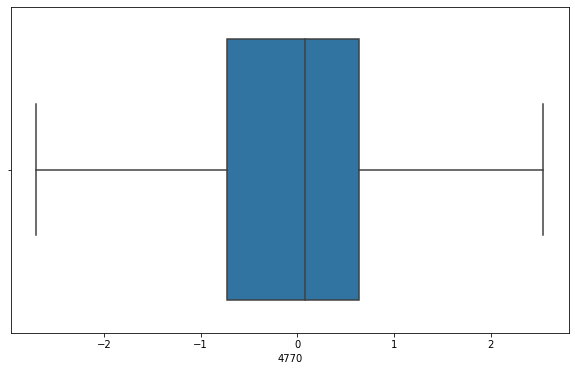

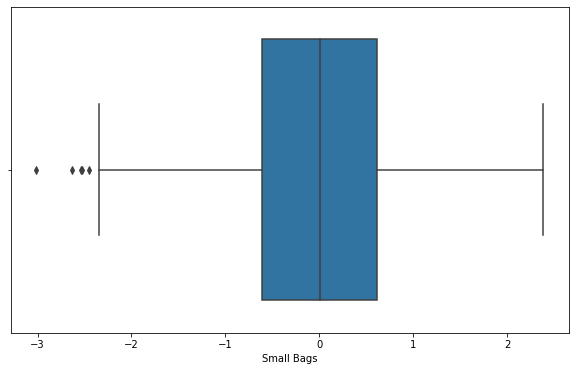

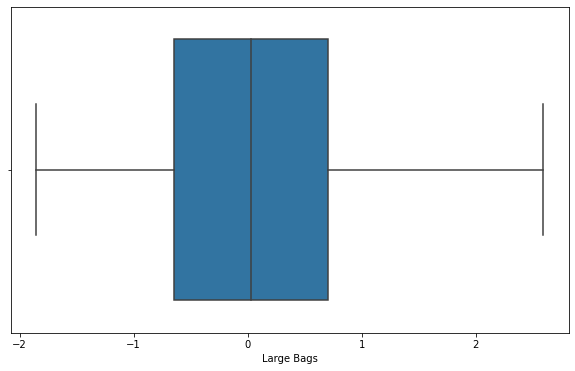

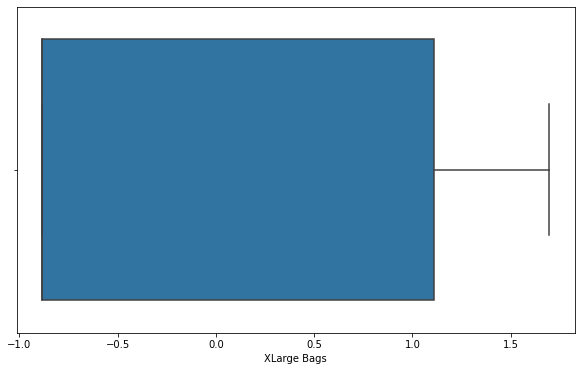

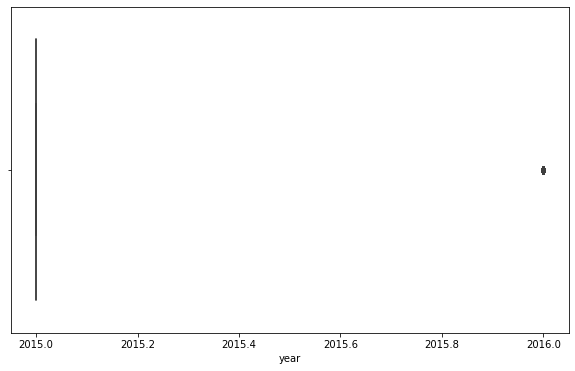

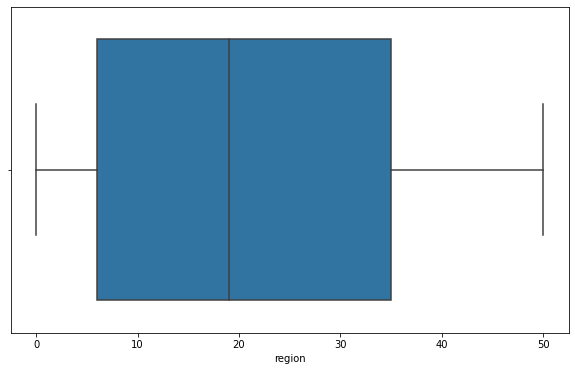

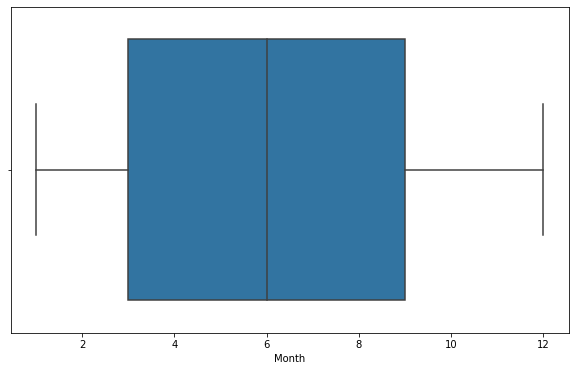

In [33]:
for i in df.columns:
  plt.figure(figsize=(10,6))
  sns.boxplot(df[i])

**outlier is removed**

In [34]:
df.shape

(1517, 12)

In [35]:
from scipy import stats
import numpy as np
print("Old Shape: ", df.shape)   
z = np.abs(stats.zscore(df))
print(z)

Old Shape:  (1517, 12)
[[1.31347192 1.35048079        nan ... 0.44100815 1.3143384  1.72065124]
 [0.51745786 1.45639674        nan ... 0.44100815 1.3143384  1.72065124]
 [0.27855619 0.76783831        nan ... 0.44100815 1.3143384  1.72065124]
 ...
 [1.52943542 2.14485045        nan ... 2.26753179 0.88028586 1.13070256]
 [1.08603933 2.09189247        nan ... 2.26753179 0.88028586 0.83572822]
 [0.29002527 1.88006056        nan ... 2.26753179 0.88028586 0.83572822]]


In [36]:
threshold = 3
print(np.where(z > 3))

(array([ 154,  760, 1411, 1457, 1458]), array([6, 1, 1, 1, 1]))


In [37]:
after_zscore = df[(z < 3).all(axis=1)]

In [38]:
after_zscore.shape

(0, 12)

In [39]:
after_zscore.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,year,region,Month


### since z_score removes all the data from table this methord is not suggested

In [41]:
df.skew()

Date            0.027740
AveragePrice   -0.109444
Total Volume    0.000000
4046           -0.012059
4225            0.008450
4770           -0.032945
Small Bags      0.027632
Large Bags     -0.074795
XLarge Bags     0.417289
year            1.828332
region          0.288146
Month           0.233418
dtype: float64

In [42]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Small Bags      0
Large Bags      0
XLarge Bags     0
year            0
region          0
Month           0
dtype: int64

## **4.TEST TRAIN SPLIT**

In [43]:
x= df.drop(columns='AveragePrice')
y= df['AveragePrice']

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=47)

### **SCALING**

In [45]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(x_train)

# transform training data
x_train_norm = norm.transform(x_train)

# transform testing dataabs
x_test_norm = norm.transform(x_test)

In [46]:
x_test=pd.DataFrame(x_test_norm)
x_train=pd.DataFrame(x_train_norm)

In [47]:
x_train.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,1213.000000,1213.0,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000
mean,0.483539,0.0,0.449291,0.521484,0.489639,0.560767,0.416513,0.348745,0.158285,0.426892,0.472457
std,0.292526,0.0,0.218545,0.185730,0.202378,0.186373,0.224553,0.393925,0.365159,0.321905,0.307179
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.233333,0.0,0.323746,0.388915,0.345066,0.447070,0.269389,0.000000,0.000000,0.120000,0.181818
50%,0.466667,0.0,0.449214,0.507016,0.504509,0.562381,0.419317,0.000000,0.000000,0.380000,0.454545
75%,0.700000,0.0,0.598594,0.658708,0.630881,0.676789,0.573189,0.780939,0.000000,0.720000,0.727273
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [49]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
predictions=lm.predict(x_test)

In [51]:
import numpy as np
from sklearn import metrics
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,predictions))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,predictions))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,predictions))

Mean Absolute Error:  0.12383694824681656
Mean Squared Error:  0.023896990785074637
Root Mean Squared Error:  0.15458651553442376
Explained Variance Score:  0.32635266055486023


### **FINDING BEST random_state**

In [52]:
from sklearn.metrics import r2_score
d=5
for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=i)
  lm=LinearRegression()
  lm.fit(x_train,y_train)
  pred_train=lm.predict(x_train)
  pred_test = lm.predict(x_test)
  a=r2_score(y_train,pred_train)
  b=r2_score(y_test,pred_test)
  c=a-b
  print(i,c)
  if d>=c:
    d=c
    print("least value",i,d)

0 0.05743018417151624
least value 0 0.05743018417151624
1 -0.07721507506941516
least value 1 -0.07721507506941516
2 -0.08102442387297215
least value 2 -0.08102442387297215
3 0.10715506303154554
4 0.16947895217374276
5 -0.0065351928972650075
6 0.0576507358555417
7 0.059936167881414315
8 -0.003090744520420907
9 0.00965382847478291
10 -0.0029666989941977695
11 0.024661609995837108
12 0.03588353444531145
13 0.04981516348791759
14 0.0646891423811381
15 -0.0016407878695055
16 -0.0004447058839491813
17 -0.014957620153850826
18 0.001940196457113852
19 0.026040997920138476
20 -0.024933499723835628
21 0.02774110807742991
22 -0.03019131115185747
23 -0.016330944979033646
24 0.020204459287592957
25 -0.0301618266759045
26 -0.0022821043108079975
27 -0.03468894574941195
28 -0.0350941634388533
29 -0.0020895345950860955
30 -0.07785614221040293
31 0.0771140732895449
32 -0.0023454861433377383
33 0.05074491149138671
34 0.04147928981864124
35 0.029963559089814074
36 -0.004896985686699273
37 0.09575028049888

**RANDOM STATE 2 GIVES LEAST DIFFERENCE BETWEEN TEST AND TRAIN R2 SCORE**

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

## **5.MODEL CONSTRUCTION**

### **LinearRegression**

In [54]:
LR=LinearRegression()
LR.fit(x_train,y_train)
print(LR.score(x_train,y_train))
LR_predict=LR.predict(x_test)

0.3004648157124057


In [55]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,LR_predict))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,LR_predict))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,LR_predict)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,LR_predict))
print('r2_score:',r2_score(y_test,LR_predict))

Mean Absolute Error:  0.11585206188885867
Mean Squared Error:  0.02168539578135393
Root Mean Squared Error:  0.1472596203354943
Explained Variance Score:  0.38323118575038506
r2_score: 0.38148923958537784


### **RandomForestRegressor**

In [56]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [57]:
predictions1=rf.predict(x_test)

In [58]:
import numpy as np
from sklearn import metrics
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,predictions1))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,predictions1))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,predictions1)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,predictions1))
print('r2_score:',r2_score(y_test,predictions1))

Mean Absolute Error:  0.05901710526315786
Mean Squared Error:  0.0060985791447368395
Root Mean Squared Error:  0.07809340013558662
Explained Variance Score:  0.8309259718792186
r2_score: 0.826056353211533


### **SVR**

In [59]:
from sklearn.svm import SVR

svr=SVR()
svr.fit(x_train,y_train)
print(svr.score(x_train,y_train))
svr_predict=svr.predict(x_test)

0.028796201377847885


In [60]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,svr_predict))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,svr_predict))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,svr_predict)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,svr_predict))
print('r2_score:',r2_score(y_test,svr_predict))

Mean Absolute Error:  0.13835008361908946
Mean Squared Error:  0.034250700197091304
Root Mean Squared Error:  0.18506944695732816
Explained Variance Score:  0.034697336469750706
r2_score: 0.023101683859903965


### **DecisionTreeRegressor**

In [61]:
from sklearn.tree import DecisionTreeRegressor

DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
print(DTR.score(x_train,y_train))
DTR_PRED=DTR.predict(x_test)

1.0


In [62]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,DTR_PRED))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,DTR_PRED))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,DTR_PRED)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,DTR_PRED))
print('r2_score:',r2_score(y_test,DTR_PRED))

Mean Absolute Error:  0.0769736842105263
Mean Squared Error:  0.01230657894736842
Root Mean Squared Error:  0.11093502128439162
Explained Variance Score:  0.6520736283264499
r2_score: 0.6489918109133914


### **GradientBoostingRegressor**

In [63]:
from sklearn.ensemble import GradientBoostingRegressor

GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
print(GBR.score(x_train,y_train))
GBR_PRED=GBR.predict(x_test)

0.8539729711068729


In [64]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,GBR_PRED))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,GBR_PRED))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,GBR_PRED)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,GBR_PRED))
print('r2_score:',r2_score(y_test,GBR_PRED))

Mean Absolute Error:  0.07446191212415745
Mean Squared Error:  0.008812157100452188
Root Mean Squared Error:  0.09387309039576884
Explained Variance Score:  0.7520049105059143
r2_score: 0.7486596950293938


### **Ridge**

In [65]:
from sklearn.linear_model import Ridge

R=Ridge()
R.fit(x_train,y_train)
print(R.score(x_train,y_train))
R_predict=R.predict(x_test)

0.3004636013850409


In [66]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,R_predict))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,R_predict))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,R_predict)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,R_predict))
print('r2_score:',r2_score(y_test,R_predict))

Mean Absolute Error:  0.11586046695523496
Mean Squared Error:  0.02168878863294903
Root Mean Squared Error:  0.1472711398507835
Explained Variance Score:  0.3831359019883749
r2_score: 0.38139246868752463


### After evaluating the model based on MAE,MSE,RMSE,EVS,R2 SCORE the 3 best models choosen for hyper parameter tuning are

1.RandomForestRegressor

2.GradientBoostingRegressor

3.DecisionTreeRegressor


## **5.Hyper Parameter Tuning**

### RandomForestRegressor

In [67]:
RF=RandomForestRegressor()
param={
     'n_estimators':[100,200,],
    'criterion':["mse", "mae"],
    'min_samples_split':[2],
   'min_samples_leaf' : [1],
}

In [69]:
from sklearn.model_selection import GridSearchCV
RF_grid=GridSearchCV(RandomForestRegressor(),param,cv=4)

In [70]:
RF_grid.fit(x_train,y_train)
RF_grid_PRED=RF_grid.best_estimator_.predict(x_test)

In [71]:
RF_grid.best_params_

{'criterion': 'mse',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [72]:
rf=RandomForestRegressor(criterion='mse',min_samples_leaf=1,min_samples_split=2,n_estimators=200)
rf.fit(x_train,y_train)
rf_predictions=rf.predict(x_test)

In [73]:
import numpy as np
from sklearn import metrics
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,rf_predictions))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,rf_predictions))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,rf_predictions)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,rf_predictions))
print('r2_score:',r2_score(y_test,rf_predictions))

Mean Absolute Error:  0.05922368421052628
Mean Squared Error:  0.006013369062499993
Root Mean Squared Error:  0.07754591583378194
Explained Variance Score:  0.8343929323003825
r2_score: 0.8284867147917732


### DecisionTreeRegressor

In [74]:
from sklearn.model_selection import GridSearchCV
parameter = {"max_depth":[1,3,5,7,9,11,12],
             'criterion':['mse','friedman_mse']}
GCV = GridSearchCV(DecisionTreeRegressor(),parameter,cv=5)

In [75]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['mse', 'friedman_mse'],
                         'max_depth': [1, 3, 5, 7, 9, 11, 12]},
             pre_dispatch='2

In [76]:
GCV.best_params_

{'criterion': 'mse', 'max_depth': 9}

In [77]:
from sklearn.tree import DecisionTreeRegressor

DTR=DecisionTreeRegressor(criterion='mse',max_depth=9)
DTR.fit(x_train,y_train)
DTR_final=DTR.predict(x_test)

In [78]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,DTR_final))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,DTR_final))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,DTR_final)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,DTR_final))
print('r2_score:',r2_score(y_test,DTR_final))

Mean Absolute Error:  0.08211207745154472
Mean Squared Error:  0.013374584099802241
Root Mean Squared Error:  0.11564853695487133
Explained Variance Score:  0.6279366147660607
r2_score: 0.6185301727851832


### GradientBoostingRegressor

In [79]:
parameter = {"loss":['ls', 'lad', 'huber', 'quantile'],
             "criterion":['friedman_mse', 'mse', 'mae']}
GBR = GridSearchCV(GradientBoostingRegressor(),parameter,cv=5)

In [80]:
GBR.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
                 

In [81]:
GBR.best_params_

{'criterion': 'mse', 'loss': 'ls'}

In [82]:
from sklearn.ensemble import GradientBoostingRegressor

GBR=GradientBoostingRegressor(criterion='mse',loss='ls')
GBR.fit(x_train,y_train)
GBR_final=GBR.predict(x_test)

In [83]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,GBR_final))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,GBR_final))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,GBR_final)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,GBR_final))
print('r2_score:',r2_score(y_test,GBR_final))

Mean Absolute Error:  0.0744771300057164
Mean Squared Error:  0.008824510912545052
Root Mean Squared Error:  0.09393886795435132
Explained Variance Score:  0.7516809676094497
r2_score: 0.7483073396567448


### THE BEST MODEL AFTER HYPER PARAMETER TUNING IS **Random Forest Regressor**

In [110]:
print("FINAL MODEL")
print("-----------------------------------------")
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,rf_predictions))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,rf_predictions))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,rf_predictions)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,rf_predictions))
print('r2_score:',r2_score(y_test,rf_predictions))

FINAL MODEL
-----------------------------------------
Mean Absolute Error:  0.05922368421052628
Mean Squared Error:  0.006013369062499993
Root Mean Squared Error:  0.07754591583378194
Explained Variance Score:  0.8343929323003825
r2_score: 0.8284867147917732


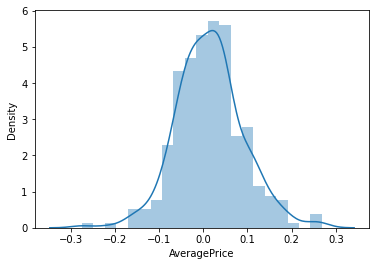

In [85]:
sns.distplot(rf_predictions-y_test)

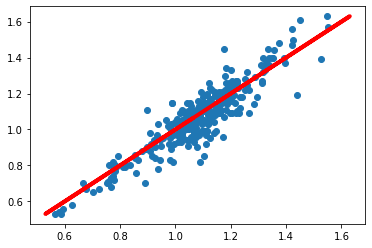

In [86]:
plt.scatter(rf_predictions,y_test)
plt.plot(y_test,y_test,linewidth=4,color='Red')

## **6.SAVING THE MODEL**

In [87]:
import joblib
joblib.dump(rf,"final model.pkl")

['final model.pkl']